In [50]:
import pandas as pd

In [140]:
wp_data=pd.read_csv("D:/UEA/Kaggle Practice/water_potability.csv")

In [52]:
wp_data.head(5)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
wp_data.shape

(3276, 10)

In [5]:
wp_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
wp_data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [96]:
wp_data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [7]:

#Normazing the data to use knn imputer to handle missing values
wp_data.isnull().sum()/wp_data.shape[0]

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [8]:
X=wp_data.iloc[:,0:9]

In [53]:
y=wp_data.iloc[:,-1]

In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [41]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skelarn.utils import resample

In [55]:
from sklearn.pipeline import Pipeline

In [81]:
def optimize_k(X, y):
    scores = []
    for k in range(1, 20, 1):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(X)
        df_imputed = pd.DataFrame(imputed, columns=X.columns)
        
       # X = df_imputed.drop(target, axis=1)
       # y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(df_imputed, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        accuracy_scores= accuracy_score(y_test, preds)
        scores.append({'K': k, 'accuracy': accuracy_scores})
        
    return scores

In [69]:
scaler = StandardScaler()
scaled_data_for_imput=scaler.fit_transform(X)
columnsName=list(wp_data.columns)
columnsName.remove("Potability")
scaled_Input_df=pd.DataFrame(scaled_data_for_imput,columns=columnsName)

In [70]:
columnsName

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [71]:
scaled_Input_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,0.259195,-0.139471,0.112415,0.838973,1.708954,-1.180651,1.273445,-1.286298
1,-2.110818,-2.036414,-0.385987,-0.307694,NaN,2.062575,0.270597,-0.622493,0.684218
2,0.638838,0.847665,-0.240047,1.360594,NaN,-0.094032,0.781117,0.001472,-1.167365
3,0.775374,0.547651,0.000493,0.592008,0.558106,-0.778830,1.255134,2.098969,0.848412
4,1.261849,-0.464429,-0.460249,-0.363698,-0.570898,-0.343939,-0.824357,-2.126974,0.138786


In [82]:
optimized_k=optimize_k(scaled_Input_df,y)


In [83]:
optimized_k

[{'K': 1, 'accuracy': 0.6661585365853658},
 {'K': 2, 'accuracy': 0.6966463414634146},
 {'K': 3, 'accuracy': 0.6798780487804879},
 {'K': 4, 'accuracy': 0.6707317073170732},
 {'K': 5, 'accuracy': 0.6905487804878049},
 {'K': 6, 'accuracy': 0.676829268292683},
 {'K': 7, 'accuracy': 0.6844512195121951},
 {'K': 8, 'accuracy': 0.6707317073170732},
 {'K': 9, 'accuracy': 0.6798780487804879},
 {'K': 10, 'accuracy': 0.6859756097560976},
 {'K': 11, 'accuracy': 0.676829268292683},
 {'K': 12, 'accuracy': 0.6661585365853658},
 {'K': 13, 'accuracy': 0.6646341463414634},
 {'K': 14, 'accuracy': 0.6844512195121951},
 {'K': 15, 'accuracy': 0.6783536585365854},
 {'K': 16, 'accuracy': 0.6783536585365854},
 {'K': 17, 'accuracy': 0.6951219512195121},
 {'K': 18, 'accuracy': 0.6814024390243902},
 {'K': 19, 'accuracy': 0.6722560975609756}]

In [105]:
y_train.value_counts()

0    1399
1     894
Name: Potability, dtype: int64

Before Sampling


<ipython-input-143-ddff756570c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampling['Potability']= y_train


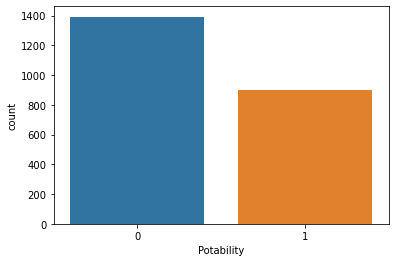

In [143]:
from sklearn.utils import resample
import seaborn as sns

#The first thing is contatenate our training data back together.  
resampling = X_train
resampling['Potability']= y_train

# separate minority and majority classes
majority_class = resampling[resampling['Potability']==0]
minority_class = resampling[resampling['Potability']==1]
print("Before Sampling")
sns.countplot( x='Potability',data=resampling)
minority_upsampled = resample(minority_class, 
                             replace=True,     # sample with replacement
                          n_samples=1399,     # to match majority class
                             random_state=7)


In [144]:
resampled=pd.concat([majority_class,minority_upsampled],axis=0)

In [145]:
resampled['Potability'].value_counts()

1    1399
0    1392
Name: Potability, dtype: int64

In [146]:
resampled.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [147]:
X_train=resampled.copy()
X_train.drop(columns=['Potability'],inplace=True)

In [148]:
resampled.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [149]:
y_train=resampled[['Potability']]

In [150]:
myPipe=Pipeline(steps=[('scaler',StandardScaler()),('knnImputer',KNNImputer(n_neighbors=5)),('rfc',RandomForestClassifier())])

In [151]:
myPipe.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler', StandardScaler()), ('knnImputer', KNNImputer()),
                ('rfc', RandomForestClassifier())])

,ph
2527,NaN
3228,7.226593
579,NaN
1628,6.769769
1794,9.475316
...,...
1771,4.886057
54,10.560745
3162,9.079715
1787,9.074923


In [152]:
y_pred=myPipe.predict(X_test)

In [153]:
score=accuracy_score(y_test,y_pred)

In [154]:
score

0.6653102746693794